# Análise Exploratória de dados - Limpeza e Transformação

In [1]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [76]:
#carregamento da base de dados 
base = pd.read_csv("netflix_titles.csv")

In [77]:
#exibindo resumo da base de dados
base.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [78]:
#Informações sobre a base de dados 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [79]:
#Convertendo o tipo da coluna "date_added" para tipo Date e extraindo apenas o ano para uma outra coluna 
base["date_added"] = pd.to_datetime(base['date_added'])
base['year_added'] = base['date_added'].dt.year
base.shape

(8807, 13)

## Verificando valores nulos (Limpeza e transformação)

In [80]:
#Contando a quantidade de linhas nulas
base.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        10
dtype: int64

In [40]:
#Exibir o dado com maior frequencia na coluna 
base.country.mode()

0    United States
dtype: object

In [41]:
base.year_added.mode()

0    2019.0
dtype: float64

In [42]:
base.rating.mode()

0    TV-MA
dtype: object

In [43]:
base.duration.mode()

0    1 Season
dtype: object

In [82]:
base.date_added.mode()

0   2020-01-01
dtype: datetime64[ns]

+ **Existem muitos dados nulos na coluna "director" se eu fizer a exclusão das linhas nulas isso pode impactar muito na análise dos dados.**

+ Dessa forma vou substituir por "Director not found" os dados nulos.

In [83]:
#Substituindo valores
base['country'] = base['country'].fillna('United States')
base['year_added'] = base['year_added'].fillna(2019)
base['rating'] = base['rating'].fillna('TV-MA')
base['director'] = base['director'].fillna('Director not found')
base['date_added'] = base['date_added'].fillna('2019-01-01')

In [84]:
#Apgando colunas e linhas desnecessárias
#base.drop(['date_added'], axis= 1, inplace= True)
base.drop(['description'], axis= 1, inplace= True)
base.dropna(subset= ['cast'], inplace= True)

In [13]:
#Convertendo a coluna "year_added" em tipo inteiro.
base.year_added = base.year_added.astype(int)

In [85]:
#Contando a quantidade de linhas nulas
base.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
year_added      0
dtype: int64

In [86]:
df = base.reset_index()

In [87]:
base.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
1,s2,TV Show,Blood & Water,Director not found,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021.0
4,s5,TV Show,Kota Factory,Director not found,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24 00:00:00,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24 00:00:00,2021,PG,91 min,Children & Family Movies,2021.0


## Visualização de dados

**Tipos: TV SHOW x MOVIE**

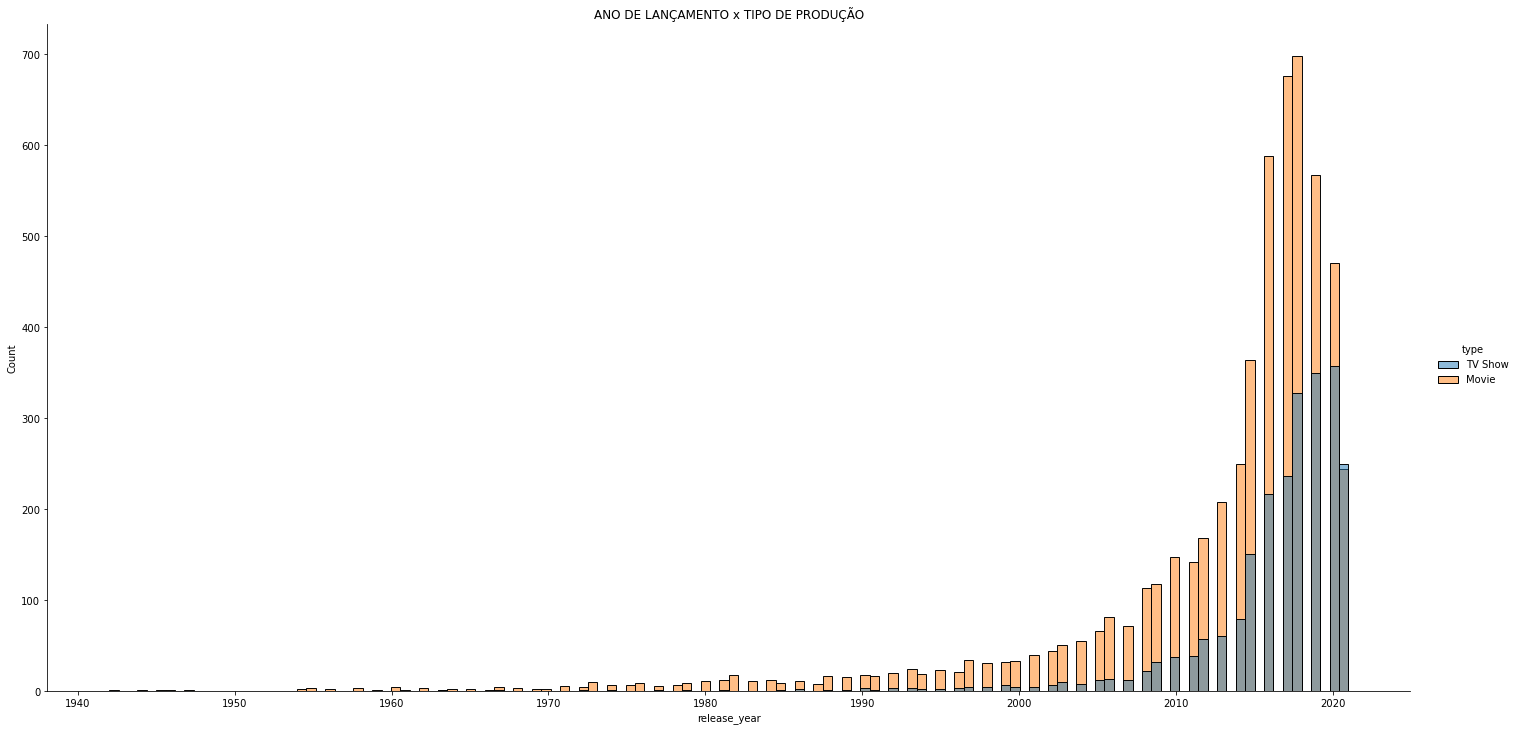

In [49]:
sns.displot(base, x='release_year', hue='type', height= 10, aspect=2)
plt.title("ANO DE LANÇAMENTO x TIPO DE PRODUÇÃO")
plt.show()

<AxesSubplot:xlabel='release_year', ylabel='type'>

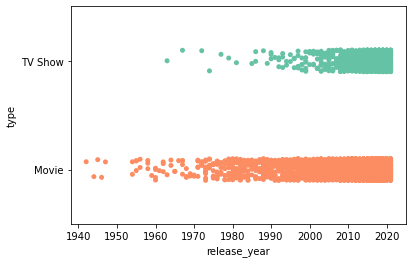

In [18]:
#visualizando a distribuição dos tipos de produção ao decorrer do tempo
sns.stripplot(x="release_year", y="type", data=base, palette="Set2")

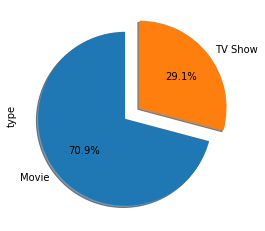

In [19]:
vc_type = base.type.value_counts()
vc_type.plot.pie( autopct='%1.1f%%', shadow=True, startangle=90 , explode = (0.07,0.14) )
plt.show()

**Visualização das regiões:**

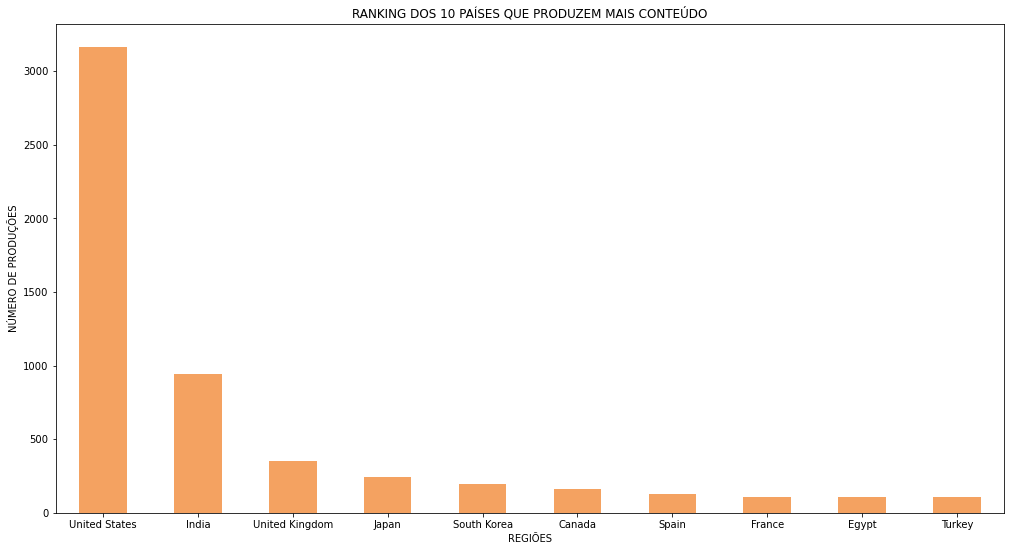

In [20]:
country_count = base.country.value_counts().head(10)
plt.figure(figsize = (17, 9))
country_count.plot.bar(color = '#f4a261')
plt.xticks(rotation = 0)
plt.xlabel("REGIÕES")
plt.ylabel("NÚMERO DE PRODUÇÕES")
plt.title("RANKING DOS 10 PAÍSES QUE PRODUZEM MAIS CONTEÚDO")

plt.show()

In [21]:
#Primeiro e ultimo ano de lançamento real de um conteúdo. 
base['release_year'].min(), base['release_year'].max()

(1942, 2021)

**Visualizando dados sobre os autores:**

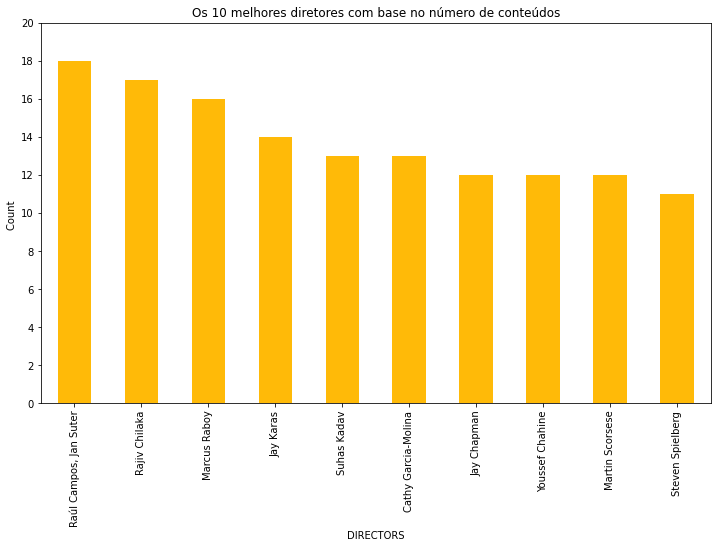

Raúl Campos, Jan Suter    18
Rajiv Chilaka             17
Marcus Raboy              16
Jay Karas                 14
Suhas Kadav               13
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: director, dtype: int64

In [22]:
direc = base.director.value_counts()[1:11]
direc.plot(kind='bar',figsize=(12,7), title= "Os 10 melhores diretores com base no número de conteúdos" , color = '#ffba08')
plt.ylabel("Count ")
plt.xlabel("DIRECTORS")
plt.yticks([int(n) for n in range(0,22,2)] )
plt.show()
direc

In [88]:
#Variaveis para dividir os tipos de produções
base_movie = base[base['type'] == 'Movie']
base_tv_show = base[base['type'] == 'TV Show']

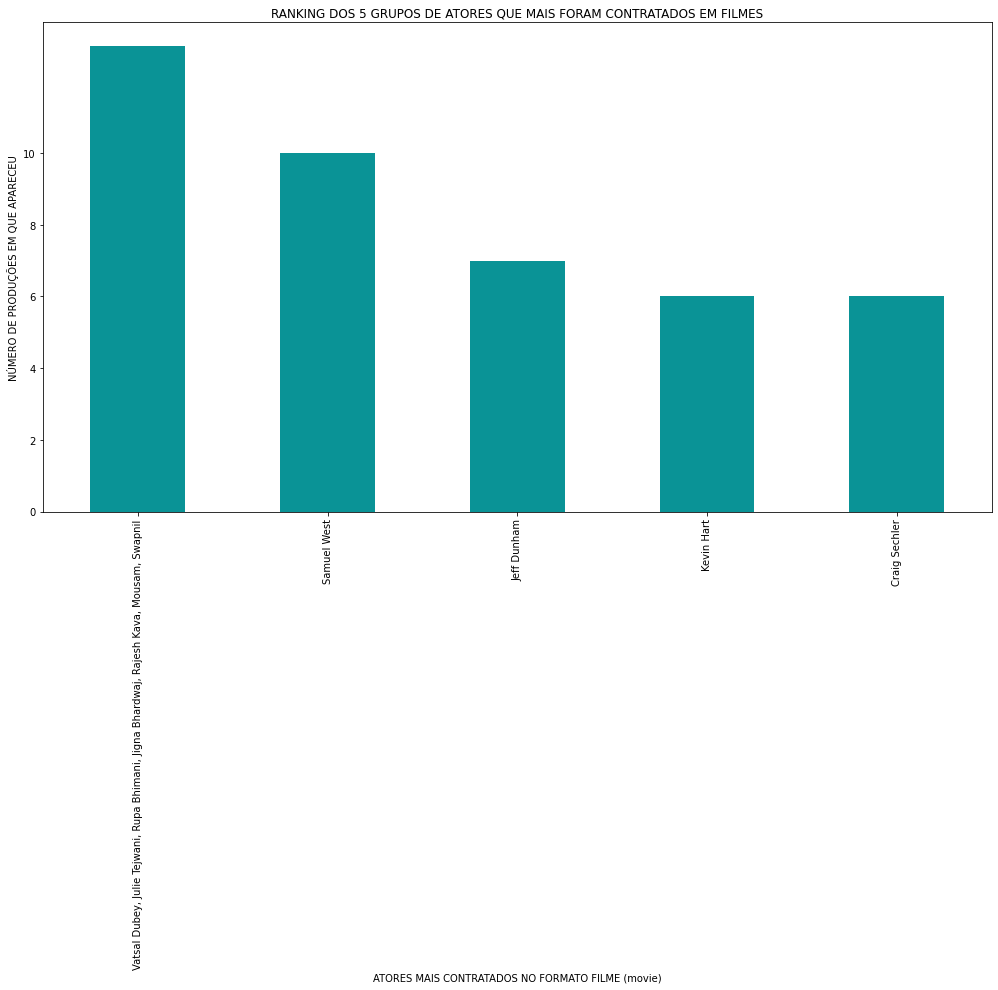

Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil    13
Samuel West                                                                                10
Jeff Dunham                                                                                 7
Kevin Hart                                                                                  6
Craig Sechler                                                                               6
Name: cast, dtype: int64

In [89]:
plt.figure(figsize = (17, 9))
base_movie.cast.value_counts().head(5).plot.bar(color="#0a9396")
plt.yticks([int(n) for n in range(0,12,2)])
plt.xlabel("ATORES MAIS CONTRATADOS NO FORMATO FILME (movie)")
plt.ylabel("NÚMERO DE PRODUÇÕES EM QUE APARECEU")
plt.title("RANKING DOS 5 GRUPOS DE ATORES QUE MAIS FORAM CONTRATADOS EM FILMES")
plt.show()
base_movie.cast.value_counts().head(5)

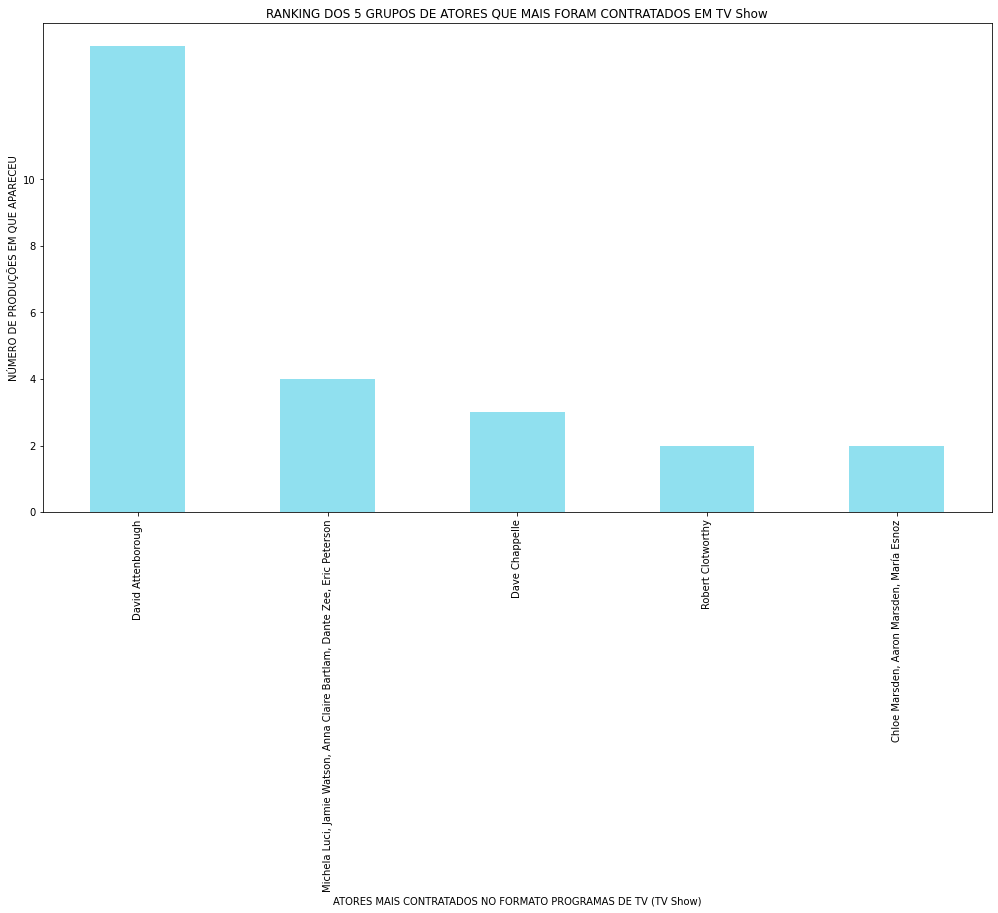

David Attenborough                                                           14
Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson     4
Dave Chappelle                                                                3
Robert Clotworthy                                                             2
Chloe Marsden, Aaron Marsden, María Esnoz                                     2
Name: cast, dtype: int64

In [90]:
plt.figure(figsize = (17, 9))
base_tv_show.cast.value_counts().head(5).plot.bar(color="#90e0ef")
plt.yticks([int(n) for n in range(0,12,2)])
plt.xlabel("ATORES MAIS CONTRATADOS NO FORMATO PROGRAMAS DE TV (TV Show)")
plt.ylabel("NÚMERO DE PRODUÇÕES EM QUE APARECEU")
plt.title("RANKING DOS 5 GRUPOS DE ATORES QUE MAIS FORAM CONTRATADOS EM TV Show")
plt.show()
base_tv_show.cast.value_counts().head(5)

**Visualização dos dados referente ao gênero:**

+ Identifiquei que uma obra pode ter diversos gêneros então escolherei o primeiro como sendo o gênero principal

In [91]:
base['genero'] = base['listed_in'].apply(lambda x: x.split(",")[0] ) 

In [93]:
plt.figure(figsize= (10 ,8))
genero = base.genero.value_counts() 
genero

Dramas                          1592
Comedies                        1204
Action & Adventure               853
International TV Shows           743
Children & Family Movies         573
Documentaries                    421
Kids' TV                         350
Crime TV Shows                   333
Stand-Up Comedy                  333
Horror Movies                    275
British TV Shows                 208
Anime Series                     173
International Movies             127
TV Comedies                      120
Docuseries                       107
Reality TV                        78
Classic Movies                    73
TV Dramas                         67
Thrillers                         65
Movies                            53
TV Action & Adventure             39
Romantic TV Shows                 32
Stand-Up Comedy & Talk Shows      29
Classic & Cult TV                 22
Independent Movies                20
Anime Features                    19
Music & Musicals                  18
S

<Figure size 720x576 with 0 Axes>

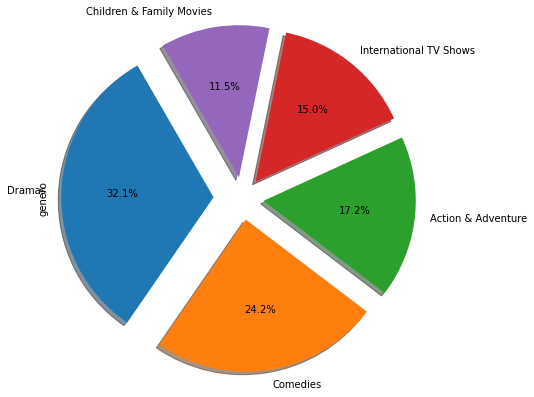

In [94]:
base.genero.value_counts()[0:5].plot.pie(figsize=(7,7),autopct='%1.1f%%', shadow=True, startangle=120 , explode = (0.19,0.14,0.14,0.14,0.14) )
plt.show()

In [95]:
#Classificando a faixa etária de visualização do conteúdo
plt.figure(figsize= (10 ,8))
base.rating.value_counts() 


TV-MA       2885
TV-14       1955
R            790
TV-PG        719
PG-13        477
TV-Y7        310
PG           279
TV-Y         268
TV-G         183
NR            63
G             40
TV-Y7-FV       4
NC-17          3
UR             3
74 min         1
66 min         1
84 min         1
Name: rating, dtype: int64

<Figure size 720x576 with 0 Axes>

In [96]:
base['rating'] = base['rating'].replace ({'TV-MA':'Adults','TV-14':'Teens','R':'Adults','TV-PG':'Kids','PG-13':'Teens',
                'TV-Y7':'Kids','PG':'Kids','TV-Y':'Kids','TV-G':'Kids','NR':'Adults','G':'Kids','TV-Y7-FV':'Kids',
                                          'NC-17':'Adults','UR':'Adults'})

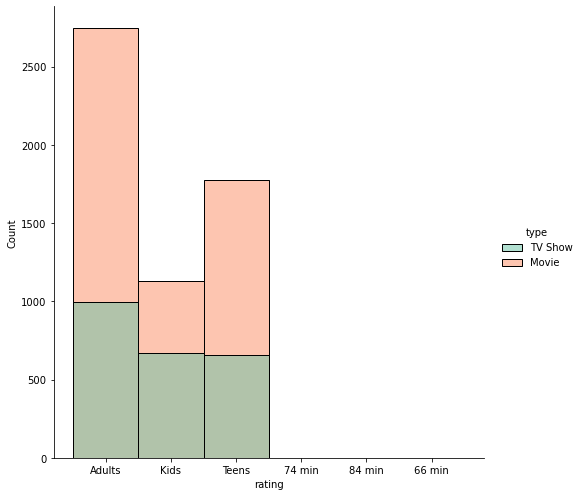

In [97]:
sns.displot(x='rating', hue='type', palette="Set2", height=7, data=base);

## Resultados e Conclusões

+ O tipo "Filme-Movie" Lidera o número de produções, mas é possível ver um crescimento 'TV-Shows-Series' nos ultimos anos porém o mercado de filmes lideram.

+ O país que mais produz series e filmes é os Estados Unidos, seguido por Índia e Reino Unido.

+ Raúl Campos e Jan Suter são os melhores diretores com base no número de obras feitas.

+ Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil são os autores mais contratados para filmes.

+ David Attenborough foi autor mais contratados para séries.

+ Dramas e comédias lideram o ranking de gêneros produzidos.

+ A classificação indicativa da maioria das obras são para Adultos, Jovens e crianças respectivamente.

In [98]:
base.to_csv('netflix_modificado.csv')